In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

bank_data = pd.read_csv(r'C:\Users\jigme\Downloads\customer_data.csv')

#Step 1: Loading and Preparing data 
df = bank_data.copy()
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [16]:
df.duplicated().sum()

0

In [21]:
# Encode categorical columns
categorical_cols = ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [20]:
# Creating target column based on purchase amount threshold
threshold_amt = df['purchase_amount'].mean()
df['made_purchase'] = df['purchase_amount'].apply(lambda x: 1 if x > threshold_amt else 0)

print(df[['purchase_amount', 'made_purchase']])

       purchase_amount  made_purchase
0                18249              1
1                 4557              0
2                11822              1
3                 4098              0
4                19685              1
...                ...            ...
99995             7075              0
99996             6873              0
99997             5152              0
99998            16312              1
99999             9426              0

[100000 rows x 2 columns]


In [24]:
#Step 2: Defining features and target variable
x = df.drop(columns=['id', 'purchase_amount', 'made_purchase'])  # Dropping non-predictive columns
y = df['made_purchase']

In [38]:
# Step 3: Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
# Step 4: Training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Step 5: Making predictions and evaluating the model
y_pred = clf.predict(X_test)

In [41]:
# Print model accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [42]:
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.8873333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     15343
           1       0.89      0.88      0.88     14657

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



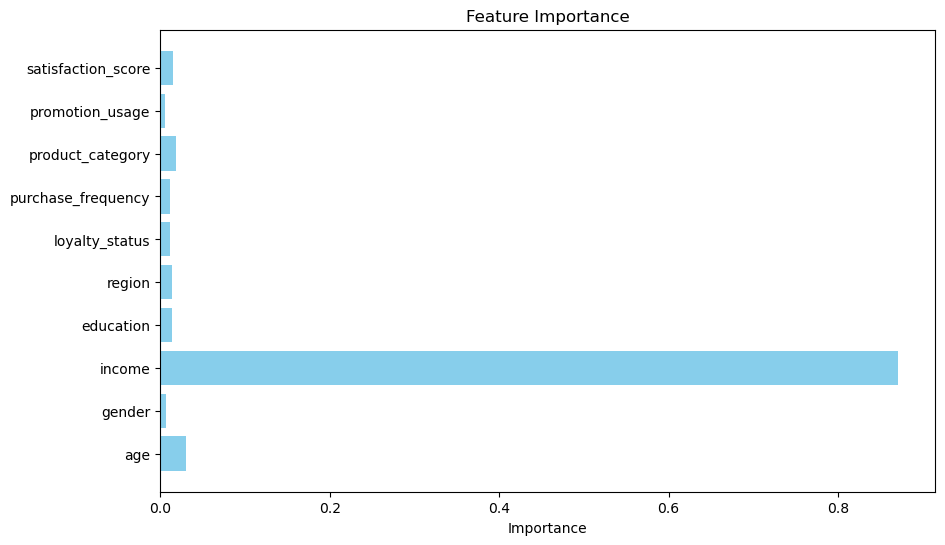

In [45]:
import matplotlib.pyplot as plt

# Plotting feature importance to see which features most strongly influence the model's decisions
feature_importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()